In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset

##### Drinking Water Standards: https://www.egyankosh.ac.in/bitstream/123456789/30954/1/Unit-7.pdf

1. 1. INITIALIZE DF (load data) AND OUTPUT NAMES OF COLUMNS

In [2]:
data_df = pd.read_csv('waterQuality1.csv') #read csv
print(data_df.keys()) #output names of columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


1. 2. OUTPUT SIZE OF DF

In [3]:
data_df.shape #output size of dataset (rows, columns)

(7999, 21)

In [4]:
data_df.size #output size of dataset (number of elements in the dataset (columns*rows))

167979

In [5]:
data_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


2. CHECK GAPS in DF

In [6]:
data_df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
# Знайдемо рядки зі значенням "#NUM!" і видалимо їх з набору даних
data_df = data_df[data_df != '#NUM!'].dropna()
data_df.shape

(7996, 21)

In [9]:
# Змінюємо тип даних стовпців 'ammonia' та 'is_safe' на стандартний для всіх float64
data_df['ammonia'] = data_df['ammonia'].astype(float)
data_df['is_safe'] = data_df['is_safe'].astype(float)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### General information and description of dataset

This is a set of data created from imaginary data of water quality in an urban environment. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge.

All attributes are numeric variables and they are listed bellow:

**aluminium** - dangerous if greater than 2.8 <br>
**ammonia** - dangerous if greater than 32.5 <br>
**arsenic** - dangerous if greater than 0.01 <br>
**barium** - dangerous if greater than 2 <br>
**cadmium** - dangerous if greater than 0.005 <br>
**chloramine** - dangerous if greater than 4 <br>
**chromium** - dangerous if greater than 0.1 <br>
**copper** - dangerous if greater than 1.3 <br>
**flouride** - dangerous if greater than 1.5 <br>
**bacteria** - dangerous if greater than 0 <br>
**viruses** - dangerous if greater than 0 <br>
**lead** - dangerous if greater than 0.015 <br>
**nitrates** - dangerous if greater than 10 <br>
**nitrites** - dangerous if greater than 1 <br>
**mercury** - dangerous if greater than 0.002 <br>
**perchlorate** - dangerous if greater than 56 <br>
**radium** - dangerous if greater than 5 <br>
**selenium** - dangerous if greater than 0.5 <br>
**silver** - dangerous if greater than 0.1 <br>
**uranium** - dangerous if greater than 0.3 <br>
**is_safe** - class attribute {0 - not safe, 1 - safe}

In [11]:
data_df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


count: кількість непорожніх значень у колонці <br>
mean: середнє арифметичне значень в колонці <br>
std: стандартне відхилення значень в колонці <br>
min: мінімальне значення в колонці <br>
25%: значення, нижче якого розташована 25% даних <br>
50%: значення, розташоване в середині впорядкованого набору даних <br>
75%: значення, нижче якого розташована 75% даних <br>
max: максимальне значення в колонці <br>

3. VIZUALIZATION DATASET: HEATMAP, HISTOGRAM, BOXPLOTS

HEATMAP (Pairwise correlation of columns)

Графік -- демонструє наскільки дані корелюються між собою (відображає кореляції
ознак між собою)<br>
Діагональ -- показує, що сама із собою колонка є прямо взаємопов'язана <br>
(кореляція береться по модулю)

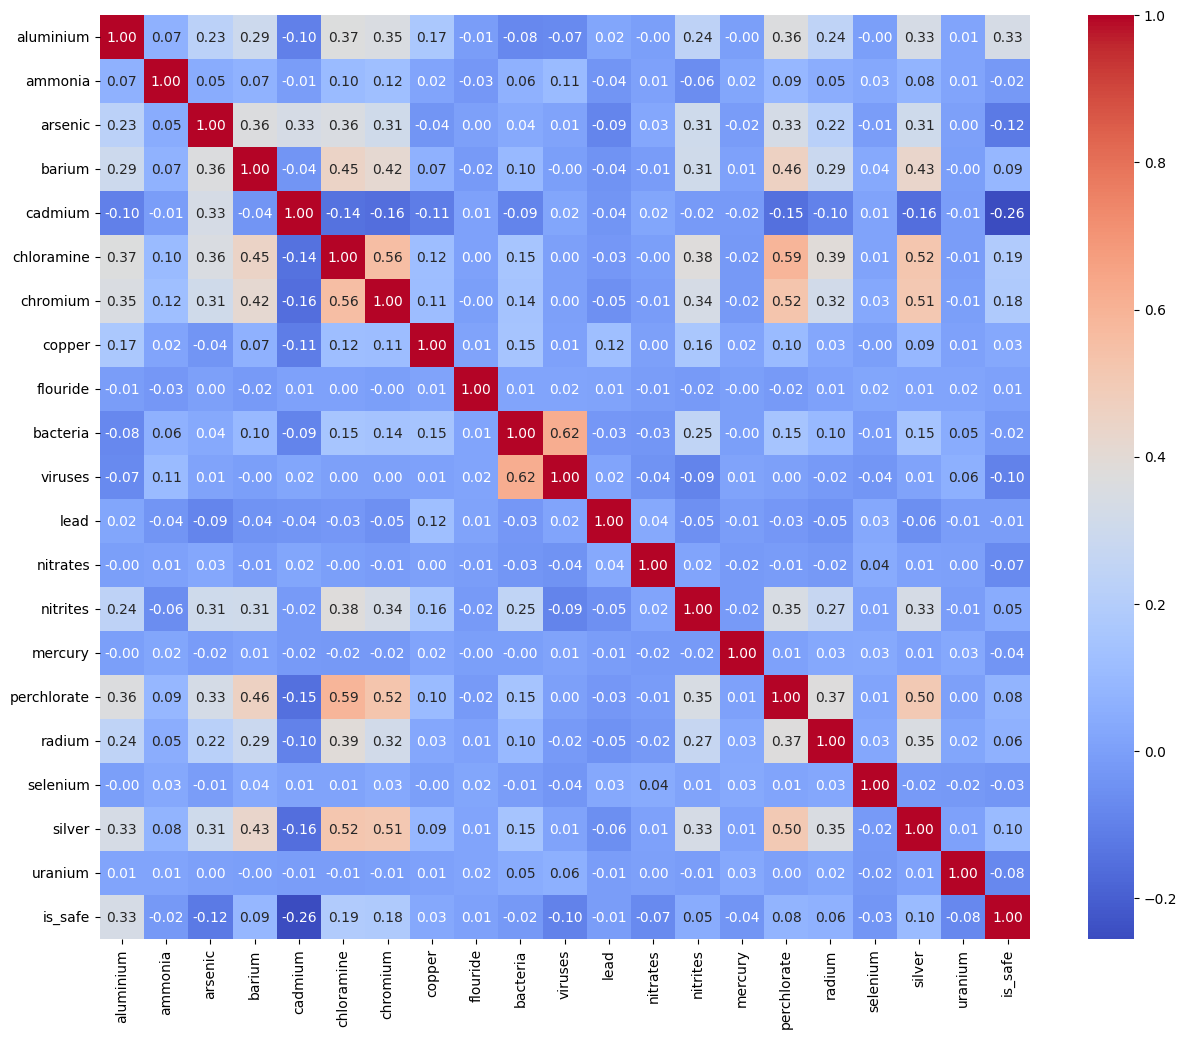

In [12]:
corr = data_df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

PAIRPLOT

Можемо побачити велику сітку графіків, де на головній діагоналі розташовані гістограми розподілу ознак для кожної змінної, і на нижній та верхній частинах сітки - графіки розсіювання для всіх можливих комбінацій числових змінних.

In [17]:
short_dataset = data_df[['aluminium', 'chromium', 'bacteria', 'perchlorate', 'silver', 'is_safe']]

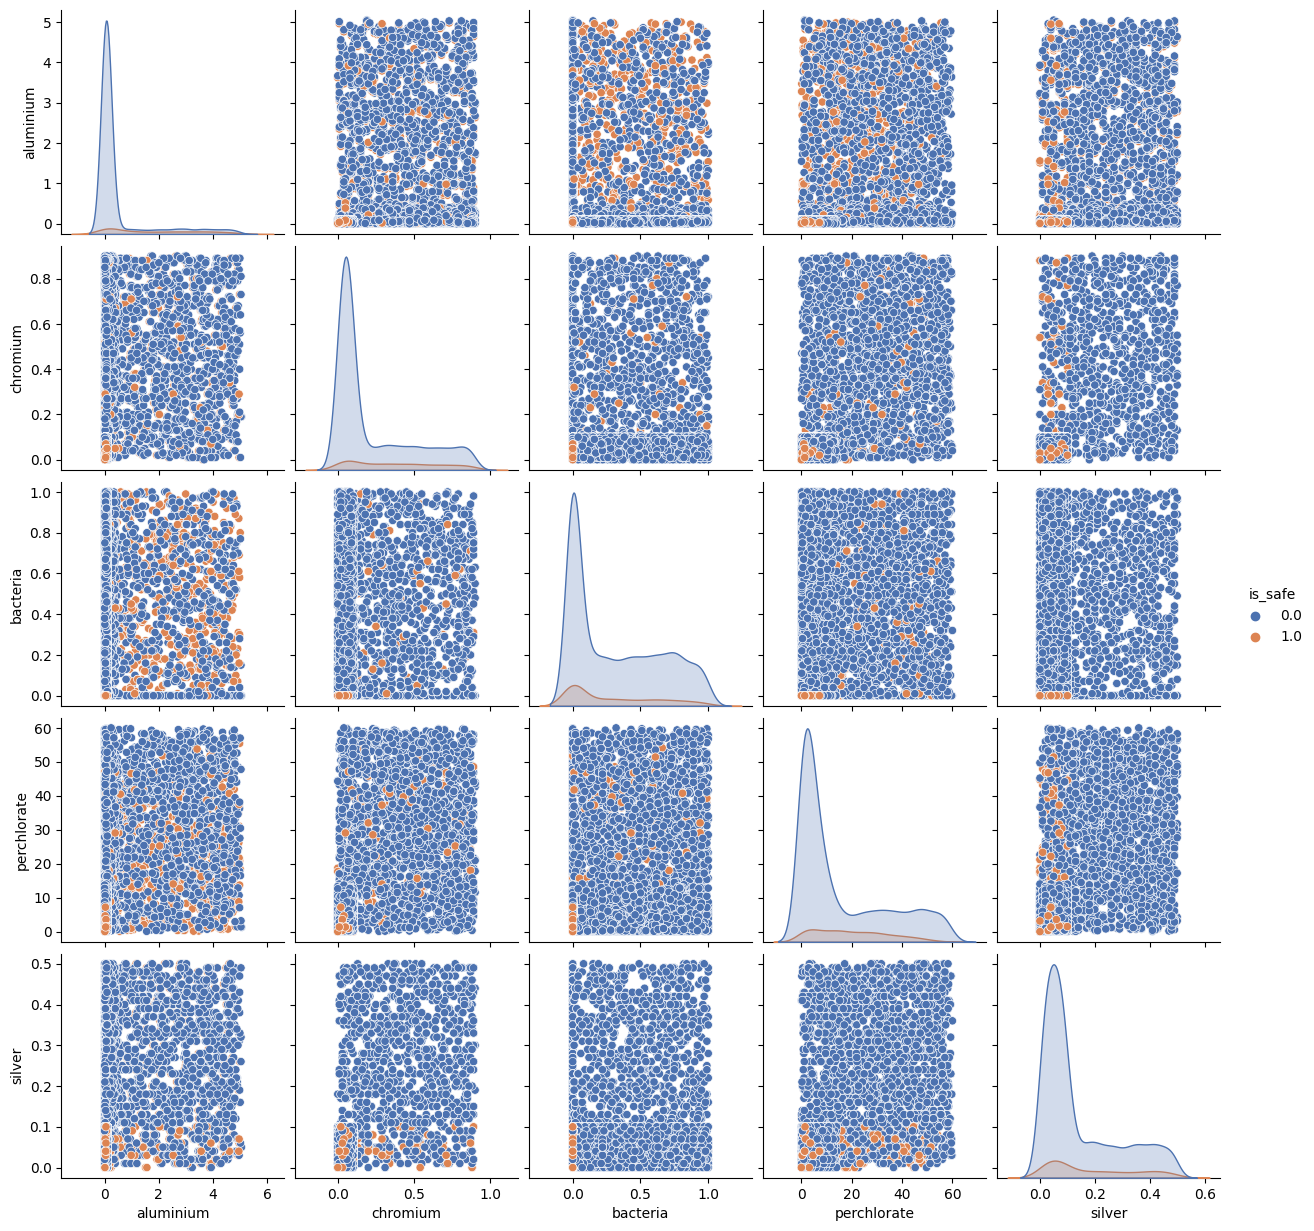

In [19]:
sns.pairplot(short_dataset, hue="is_safe", palette = 'deep') # deep - палітра кольорів за замовчуванням

BOXPLOTS

boxplots (діаграми "ящик з вусами") ознак відносно цільової змінної "is_safe"

In [20]:
y_data = data_df.drop("is_safe", axis=1)

In [21]:
y_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

**Ящик (Box):** представляє міжквартильний розмах (IQR), тобто різниця між третім (Q3) і першим (Q1) квартилями. Ящик відображає центральну половину даних. <br>

**Вуса (Whiskers):** вертикальні лінії, які виходять з ящика, відображають розмах даних, не враховуючи викиди. Зазвичай, вуса простягаються на певну відстань від ящика, і ця відстань може бути налаштована. <br>

**Медіана (Median):** лінія або точка в межах ящика позначає медіану, яка є центральним значенням впорядкованого набору даних. <br>

**Викиди (Outliers):** значення, які знаходяться далеко від ящика або вусів і вважаються аномальними або нетиповими даними.

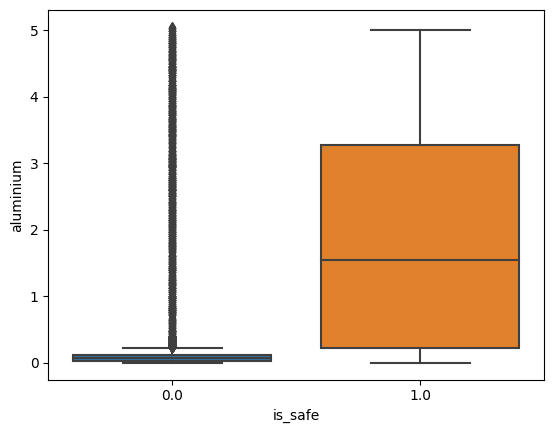

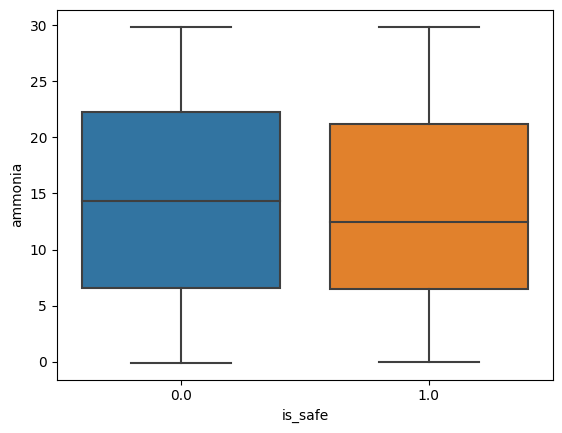

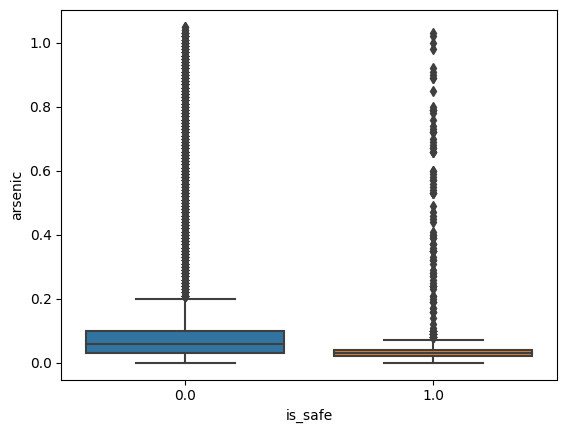

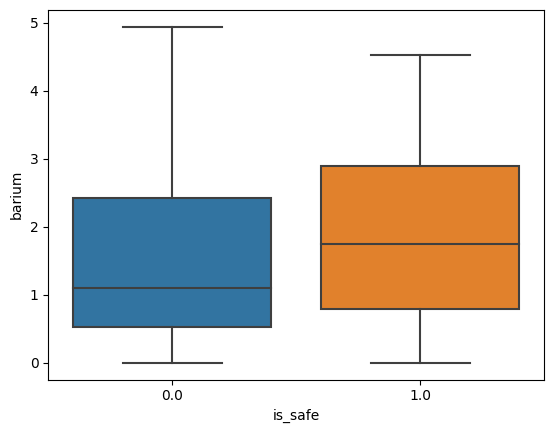

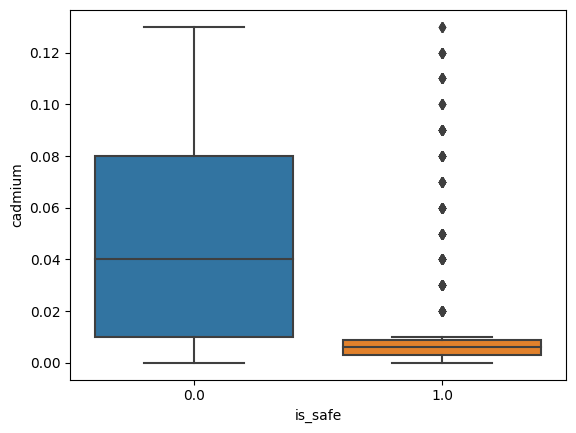

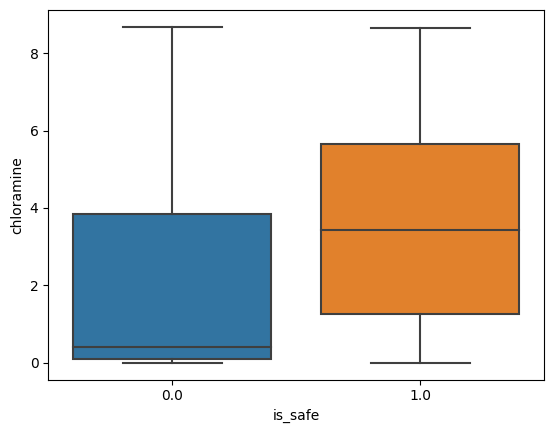

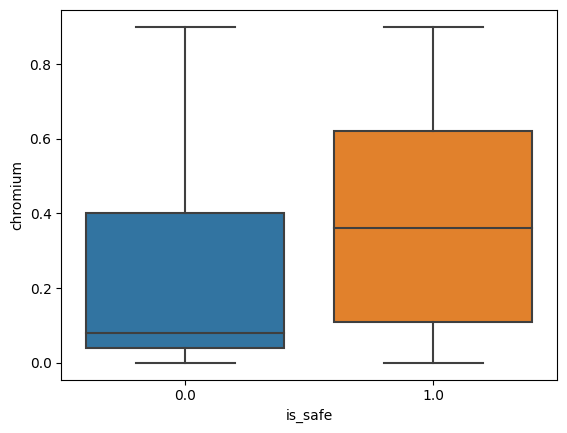

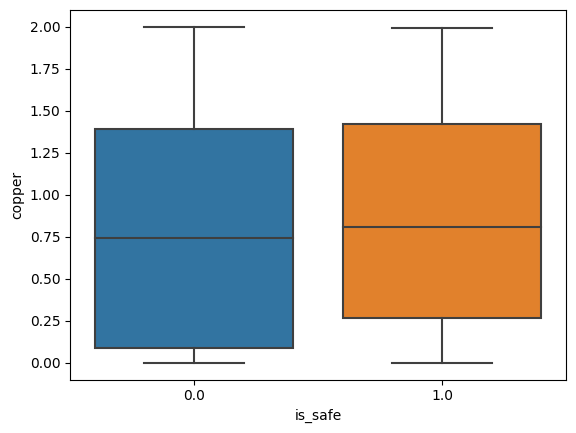

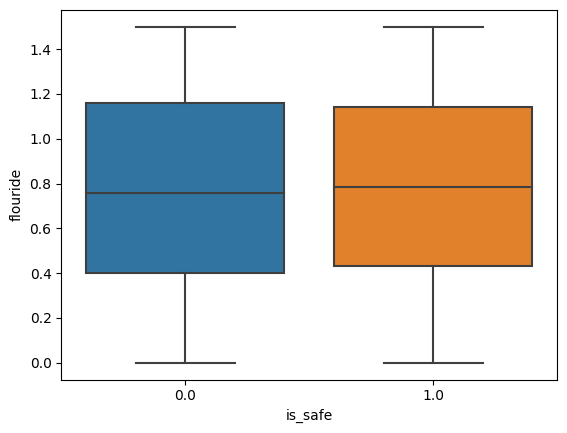

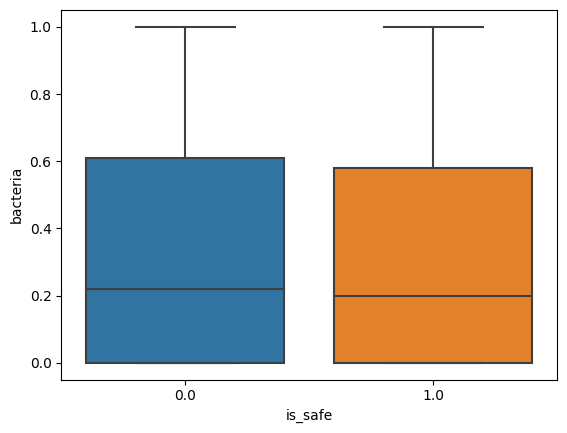

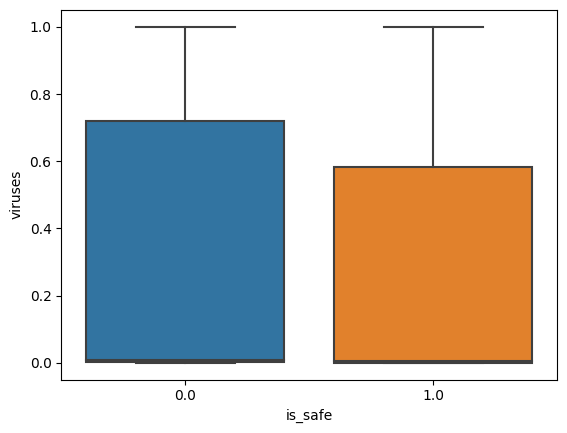

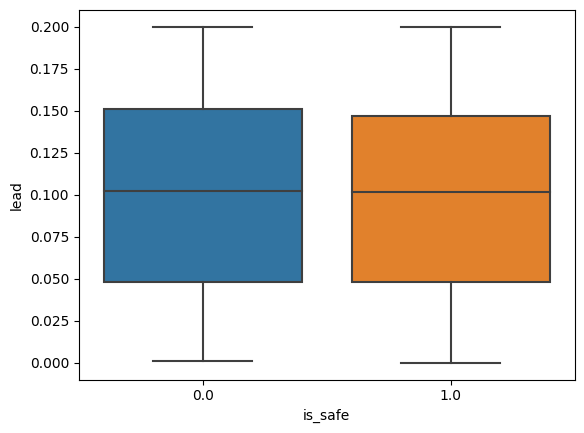

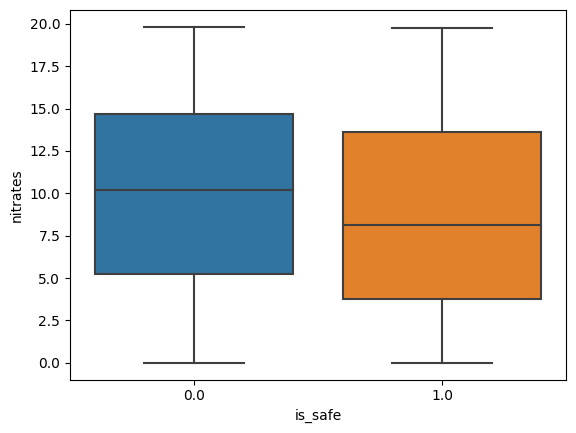

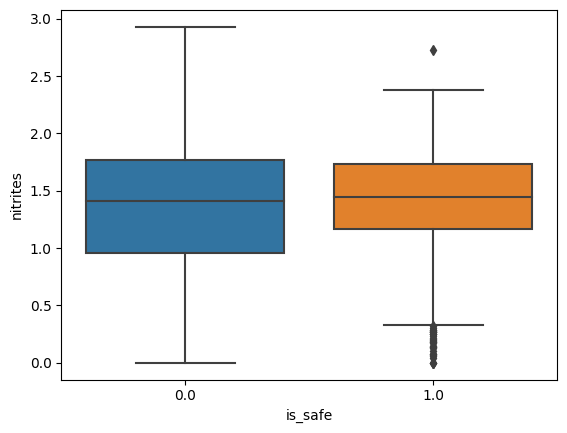

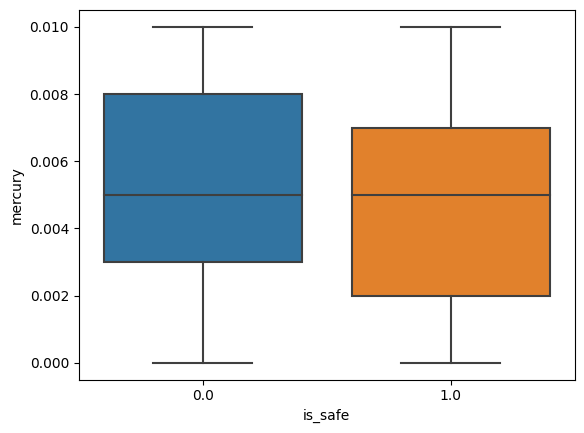

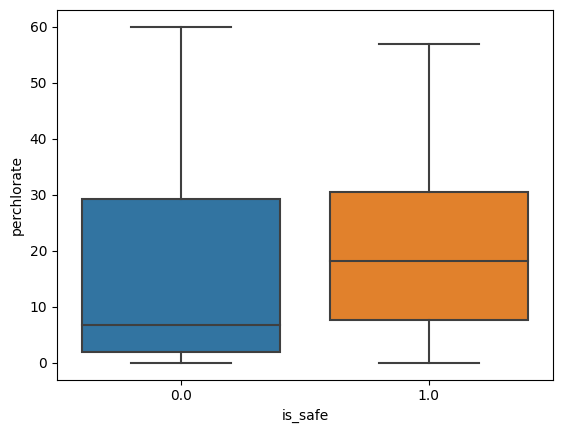

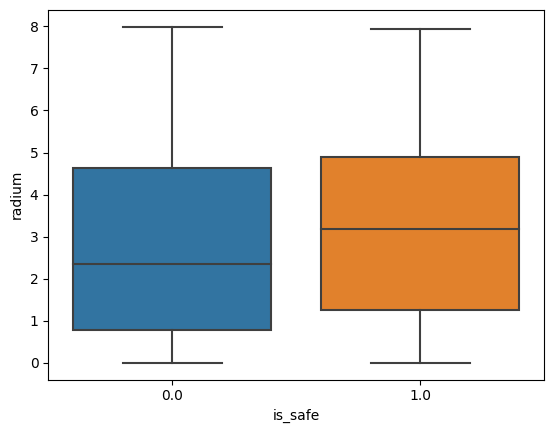

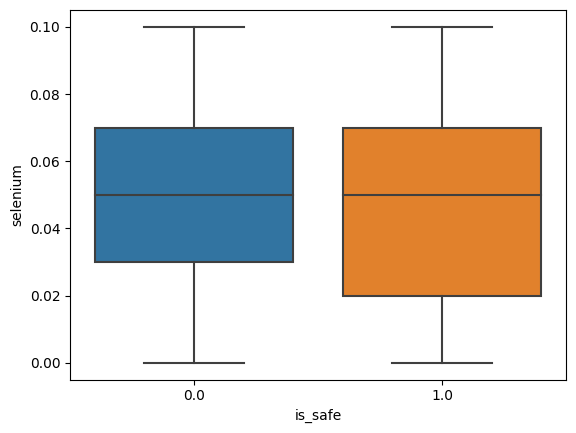

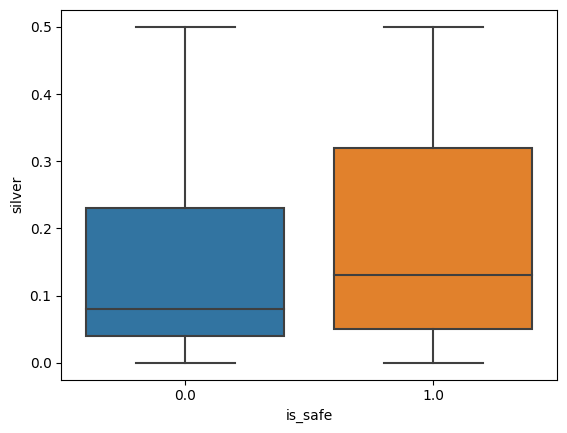

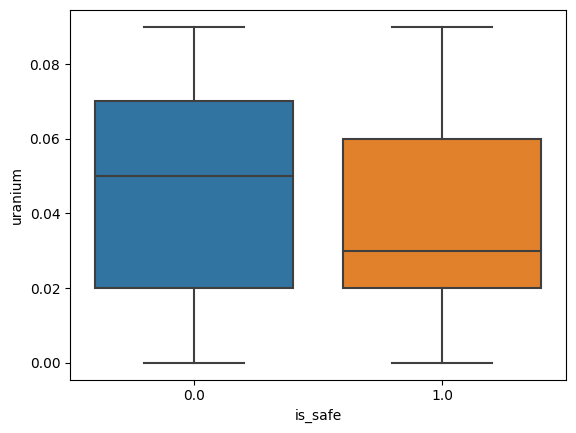

In [22]:
for i in y_data.columns:
    figure = plt.figure()
    ax = sns.boxplot(x=data_df['is_safe'], y=y_data[i])